# CS484 Homework 1 

Note: You can follow questions from markdowns and there are some answers below question in markdown format. Also, there are some comments in the code cells that you can easily follow and assess methods

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Question 1

In [2]:
# First getting the grayscale image
IMAGE_PATH_Q1 = "./Figure1.png"
original_q1 = cv2.imread(IMAGE_PATH_Q1)
gray_scale_img_q1 = cv2.cvtColor(original_q1, cv2.COLOR_BGR2GRAY)
# then making it binarized with built-in function
# I only use this built-in function in the homework to binarized image
threshold_value = 127
max_value = 255
_, binarized_img_q1 = cv2.threshold(gray_scale_img_q1, threshold_value, max_value, cv2.THRESH_BINARY)

In [3]:
# Implementing erosion algorithm into this function
def erosion(src_img, struct_el):
    # First define row and columns of structuing element with variables
    struct_row = struct_el.shape[0]
    struct_col = struct_el.shape[1]
    
    # Let's also define source image row and columns with variables
    src_row = src_img.shape[0]
    src_col = src_img.shape[1]
    
    # In order to perform convolution operation "better"
    # we should first do a "same" padding with 0's
    pad_img_rows = struct_el.shape[0] // 2
    pad_img_cols = struct_el.shape[1] // 2
    
    padded_img = np.pad(src_img, ((pad_img_rows, pad_img_rows + (struct_row % 2 == 0)),
                                   (pad_img_cols, pad_img_cols + (struct_col % 2 == 0))),
                        mode='constant', constant_values=0)
    
    # Creating a numpy array of 0's for eroded image
    # np.zeros_like is the same operation as np.zeros but it is faster
    eroded_image = np.zeros_like(src_img, dtype=np.uint8)
    
    # Executing the convolution operation with the structuring element
    for r in range(src_row):
        for c in range(src_col):
            # For erosion we use OR gate and np.all
            if np.all(struct_el <= padded_img[r:r+struct_row, c:c+struct_col]):
                eroded_image[r, c] = 1

    return eroded_image

In [4]:
# Implementing dilation algorithm into this function
def dilation(src_img, struct_el):
    # First define row and columns of structuing element with variables
    struct_row = struct_el.shape[0]
    struct_col = struct_el.shape[1]
    
    # Let's also define source image row and columns with variables
    src_row = src_img.shape[0]
    src_col = src_img.shape[1]
    # In order to perform convolution operation "better"
    # we should first do a "same" padding with 0's
    pad_img_rows = struct_el.shape[0] // 2
    pad_img_cols = struct_el.shape[1] // 2
    
    padded_img = np.pad(src_img, ((pad_img_rows, pad_img_rows + (struct_row % 2 == 0)),
                                   (pad_img_cols, pad_img_cols + (struct_col % 2 == 0))),
                        mode='constant', constant_values=0)
    
    # Creating a numpy array of 0's for dilated image
    # np.zeros_like is the same operation as np.zeros but it is faster
    dilated_image = np.zeros_like(src_img, dtype=np.uint8)
    
    # Executing the convolution operation with the structuring element
    for r in range(src_row):
        for c in range(src_col):
            # For dilation we use AND gate and np.any
            if np.any(np.logical_and(padded_img[r:r+struct_row,
                                             c:c+struct_col], struct_el)):
                dilated_image[r, c] = 1

    return dilated_image

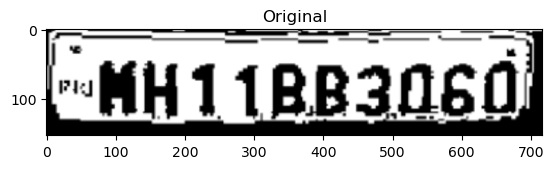

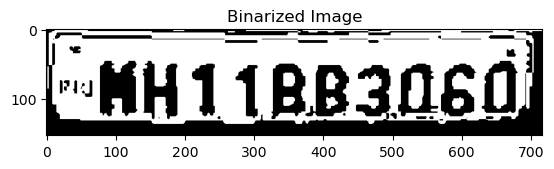

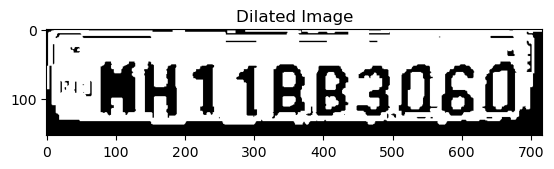

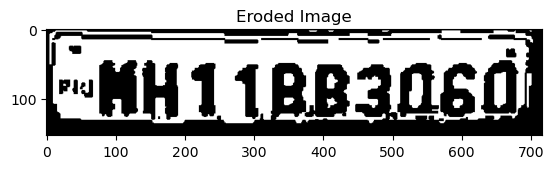

In [5]:
# Assigning filter
filter_q1 = np.array([(1, 1, 1), (1, 1, 1), (1, 1, 1)])

# original
plt.title("Original")
plt.imshow(original_q1)
plt.show()

# binarized_img
plt.title("Binarized Image")
plt.imshow(binarized_img_q1, cmap='gray')
plt.show()

# dilated_img
plt.title("Dilated Image")
dilated_img = dilation(binarized_img_q1 , filter_q1)
plt.imshow(dilated_img, cmap='gray')
plt.show()

# eroded_img
plt.title("Eroded Image")
eroded_img = erosion(binarized_img_q1, filter_q1)
plt.imshow(eroded_img, cmap='gray')
plt.show()

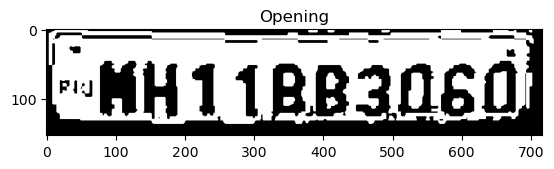

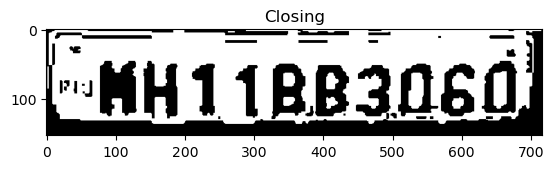

In [6]:
# Applying erosion followed by dilation (opening) to remove noise
opening = dilation(eroded_img, filter_q1)
plt.title("Opening")
plt.imshow(opening,cmap='gray')
plt.show()

# Applying dilation followed by erosion (closing) to connect broken characters
closing = erosion(dilated_img, filter_q1)
plt.title("Closing")
plt.imshow(closing, cmap='gray')
plt.show()

# Question 2

In [7]:
# Implementing histogram function
def histogram(img, return_=False): 
    # I added a return statement to this function to use it in Q3 too
    # This return has a default False statement to just plotting in Q2
    # return statement is not changing anything in the function but computanional ease
    
    # Getting the maximum pixel value of the image
    max_value = np.max(img)
    
    # Assigning variables for img col and row
    img_rows = img.shape[0]
    img_cols = img.shape[1]
    
    # Creating an array of zeros to store the pixel counts
    pix_counts = np.zeros(256)
    
    # Looping into each pixel in the image
    for r in range(img_rows):
        for c in range(img_cols):
            # Incrementing count for the pixel intensity value
            pix_counts[img[r,c]] += 1
    if return_ == True:
        return pix_counts
    else:
        # Plot the histogram
        plt.bar(range(256), pix_counts)
        plt.xlabel('Pixel intensity')
        plt.ylabel('Count')
        plt.title('Histogram')
        plt.show()


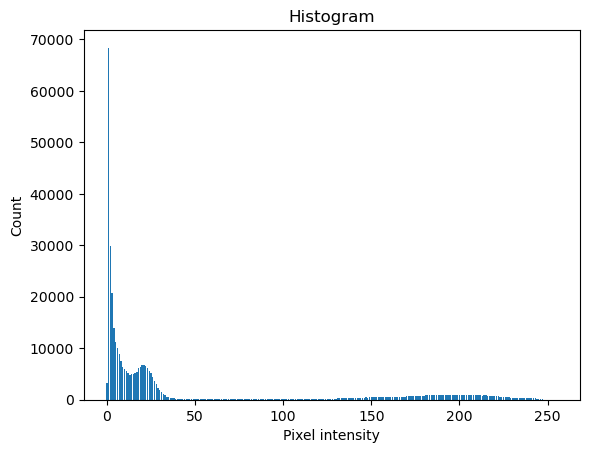

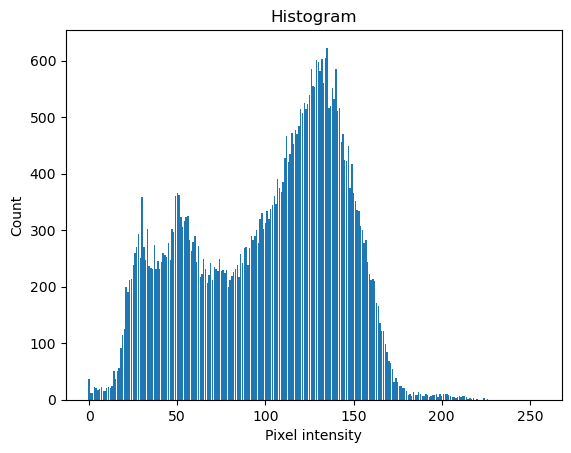

In [8]:
IMAGE_PATH_Q2_A = "./Figure2_a.jpg"
original_q2_a = cv2.imread(IMAGE_PATH_Q2_A)
gray_scale_img_q2_a = cv2.cvtColor(original_q2_a, cv2.COLOR_RGB2GRAY)
histogram(gray_scale_img_q2_a)

IMAGE_PATH_Q2_B = "./Figure2_b.jpg"
original_q2_b = cv2.imread(IMAGE_PATH_Q2_B)
gray_scale_img_q2_b = cv2.cvtColor(original_q2_b, cv2.COLOR_RGB2GRAY)
histogram(gray_scale_img_q2_b)

# Question 3

In [9]:
# implement your function below.
def otsu_threshold(source_image):
    # Point of this implementation is to Maximize inter-class variance
    # to find optimal threshold value
    
    # Getting histogram of image and max value
    hist = histogram(source_image, True)
    max_pixel_val = hist.shape[0]
    
    # print(hist.shape)
    # Calculating the total number of pixels
    num_pixel = source_image.size

    # Calculating the cumulative sum of the histogram and mean
    cumsum = [0] * max_pixel_val
    cumsum_mean = [0] * max_pixel_val
    cumsum[0] = hist[0]
    cumsum_mean[0] = hist[0] * 0
    # Looping through every pixel
    for i in range(1, max_pixel_val):
        cumsum[i] = cumsum[i - 1] + hist[i]
        cumsum_mean[i] = cumsum_mean[i - 1] + hist[i] * i

    # Calculating the probabilities and means for both background and foreground
    w_b, w_f, mean_b, mean_f = [0] * max_pixel_val, [0] * max_pixel_val, [0] * max_pixel_val, [0] * max_pixel_val
    for i in range(max_pixel_val):
        w_b[i] = cumsum[i] / num_pixel
        w_f[i] = 1 - w_b[i]
        if cumsum[i] == 0:
            mean_b[i] = 0
        else:
            mean_b[i] = cumsum_mean[i] / cumsum[i]
        if cumsum[i] == num_pixel:
            mean_f[i] = 0
        else:
            mean_f[i] = (cumsum_mean[-1] - cumsum_mean[i]) / (num_pixel - cumsum[i])

    # Calculate the inter-class variance
    icvars = [0] * max_pixel_val
    for i in range(1, max_pixel_val-1):
        icvars[i] = w_b[i] * w_f[i] * (mean_b[i] - mean_f[i]) ** 2

    # Find the max threshold value
    best_thr = icvars.index(max(icvars))

    # Binary thresholding
    binary_image = (source_image >= best_thr).astype(np.uint8) # avoiding none type return

    return binary_image, best_thr


threshold value is  152


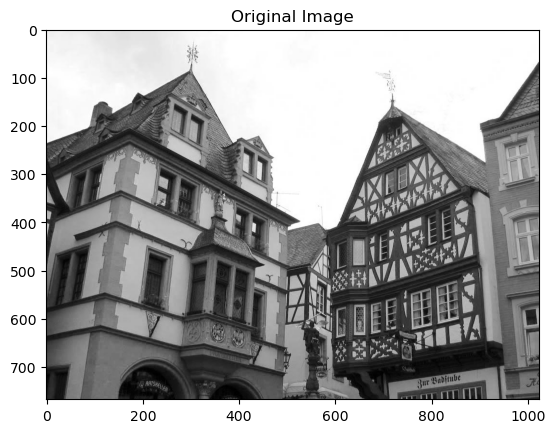

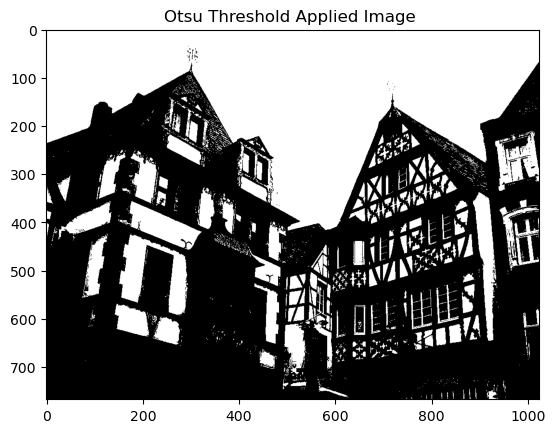

In [10]:
IMAGE_PATH_Q3_A = "./Figure3_a.jpg"
org_q3_a = cv2.imread(IMAGE_PATH_Q3_A)

gray_scale_q3_a = cv2.cvtColor(org_q3_a, cv2.COLOR_BGR2GRAY)
otsu_applied_q3_a, threshold_q3_a = otsu_threshold(gray_scale_q3_a)
print("threshold value is ",threshold_q3_a)

plt.title("Original Image")
plt.imshow(org_q3_a)
plt.show()

plt.title("Otsu Threshold Applied Image ")
plt.imshow(otsu_applied_q3_a, cmap = 'gray')
plt.show()

threshold value is  120


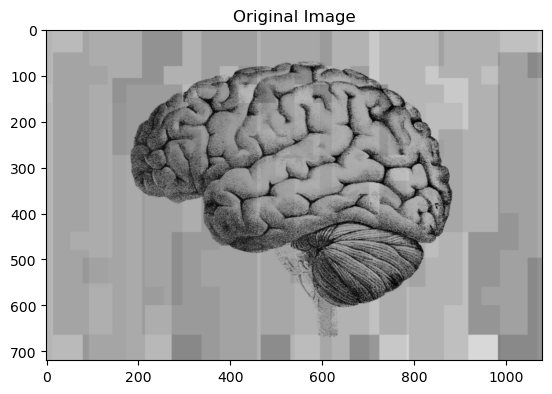

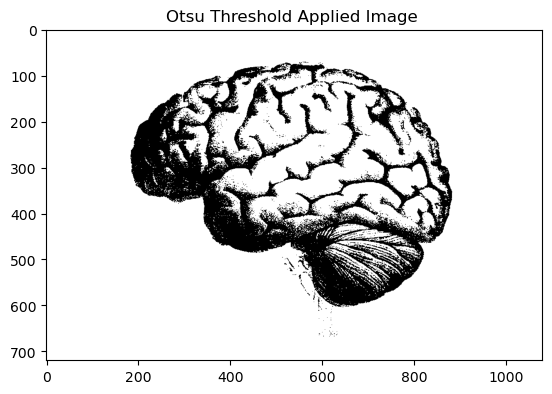

In [11]:
IMAGE_PATH_Q3_B = "./Figure3_b.png"
org_q3_b = cv2.imread(IMAGE_PATH_Q3_B)
gray_scale_q3_b = cv2.cvtColor(org_q3_b, cv2.COLOR_BGR2GRAY)
otsu_applied_q3_b, threshold_q3_b = otsu_threshold(gray_scale_q3_b)
print("threshold value is ", threshold_q3_b)

plt.title("Original Image")
plt.imshow(org_q3_b)
plt.show()

plt.title("Otsu Threshold Applied Image ")
plt.imshow(otsu_applied_q3_b, cmap = 'gray')
plt.show()

Discussing the results:

Otsu's method is an automatic thresholding technique that works well for images with bimodal histograms, i.e., images with two distinct peaks corresponding to the background and the foreground. However, it may not produce perfect results in all cases, especially when:

- The histogram is not bimodal, and the separation between the foreground and the background is not clear.
- The intensities of the foreground and the background are not uniform, leading to multiple peaks in the histogram.
- The image contains noise, which may affect the histogram and the calculated threshold.

In such cases, Otsu's method may not provide an ideal separation between the foreground and the background, and other thresholding techniques or image preprocessing steps (such as noise reduction) may be required.

# Question 4

In [12]:
# Implementing convolution in 2d
def conv2d(image, filter_kernel):
    # First lets assign variables for filter rows and columns
    fk_rows = filter_kernel.shape[0]
    fk_cols = filter_kernel.shape[1]
    
    # Lets assign variables for image rows and columns
    img_rows = image.shape[0]
    img_cols = image.shape[1]
    
    # Also, assigning padding rows and columns
    pad_rows = fk_rows // 2
    pad_cols = fk_cols // 2
    
    # Padding operation
    padded_image = np.pad(image, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=np.float32)

    # Looping over the pixels in Image
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            output[r, c] = np.sum(padded_image[r:r+fk_rows, c:c+fk_cols] * filter_kernel)

    return output

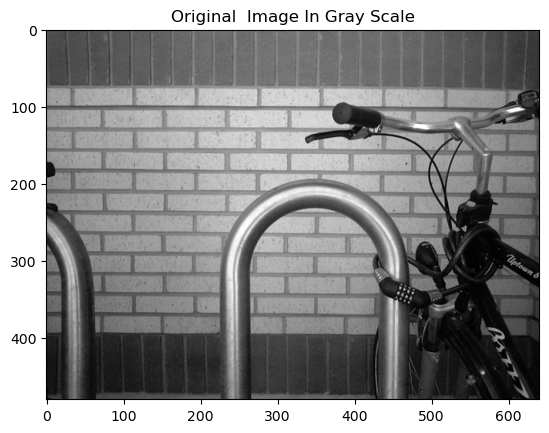

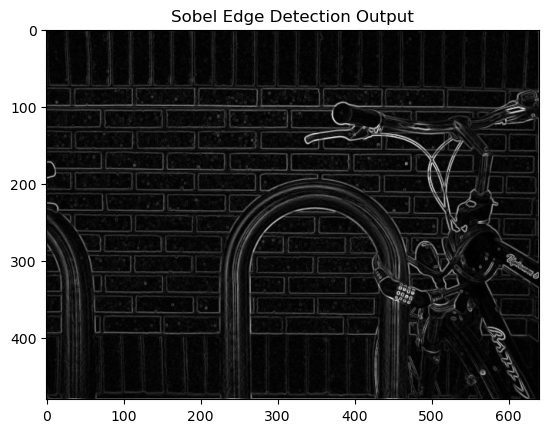

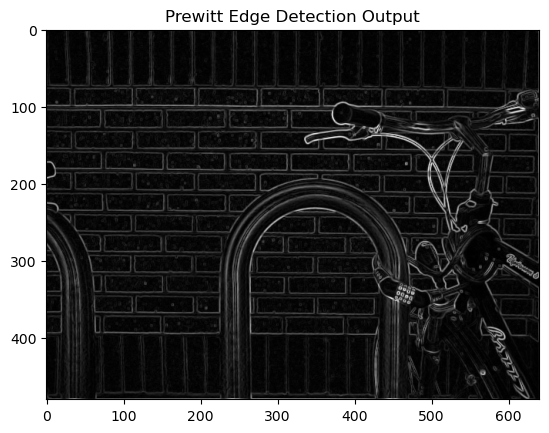

In [13]:
# Reading Image
IMAGE_PATH_Q4 = "./Figure4.jpg"
image = cv2.imread(IMAGE_PATH_Q4)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel edge detection filter for x and y
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Prewitt edge detection filter for x and y
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Applying Sobel edge detection for x and y
sobel_x_edge = conv2d(image, sobel_x)
sobel_y_edge = conv2d(image, sobel_y)

# square root of x_square + y_square
sobel_edge = np.sqrt(sobel_x_edge**2 + sobel_y_edge**2)

# Applying Prewitt edge detection for x and y
prewitt_x_edge = conv2d(image, prewitt_x)
prewitt_y_edge = conv2d(image, prewitt_y)

# square root of x_square + y_square
prewitt_edge = np.sqrt(prewitt_x_edge**2 + prewitt_y_edge**2)

# Original image in gray scale
plt.title("Original  Image In Gray Scale")
plt.imshow(image, cmap='gray')
plt.show()

# Sobel edge detection applied gray scale image
plt.title("Sobel Edge Detection Output")
plt.imshow(sobel_edge, cmap='gray')
plt.show()

# Prewitt edge detection applied gray scale image
plt.title("Prewitt Edge Detection Output")
plt.imshow(prewitt_edge, cmap='gray')
plt.show()